In [3]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [6]:
with open('tom_1.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()
text = re.sub('[^а-я ]','', text)

In [14]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [17]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1
    
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

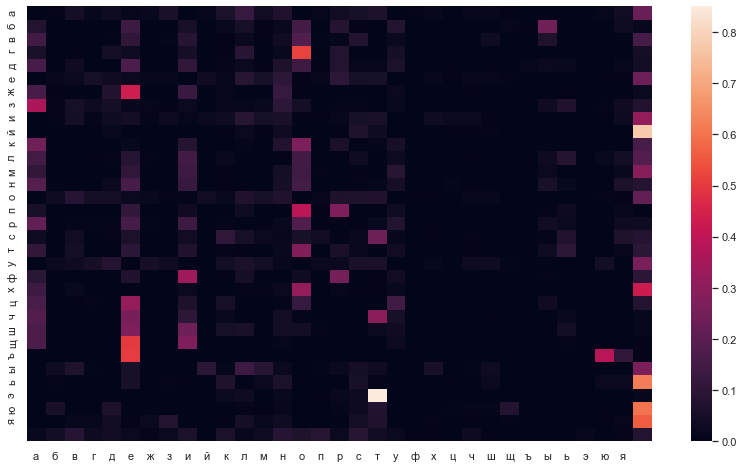

In [18]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [24]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)

sum_prob = 0
for c in RUSSIAN:
    for cc in RUSSIAN:
        proba = prior * probabilities[start, POS[c]] * probabilities[start, POS[cc]] * probabilities[POS[c], end]
        if proba > 0:
            #print(''.join(['п', c, cc, 'р']), proba)
            sum_prob += proba
print()            
print(sum_prob)


0.0012753976731675154


In [46]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

брислара 


In [47]:
series = pd.read_csv('../01. Знакомство с временными рядами/Series/international-airline-passengers.csv')['Count']

In [53]:
from hmmlearn.hmm import GaussianHMM

In [54]:
values = series.values.reshape(-1,1)

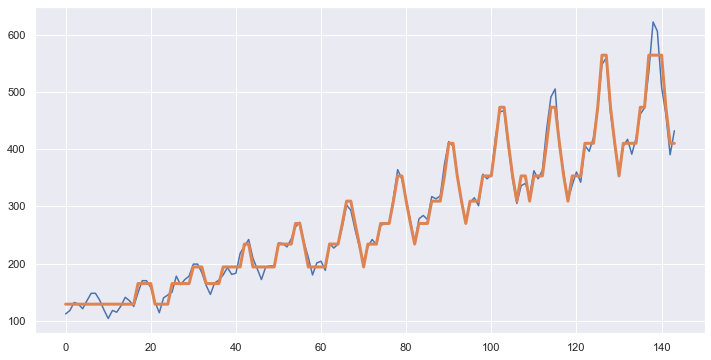

In [63]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)